In [ ]:
# Lab | SQL Queries 9

# We will be trying to predict if a customer will be renting a film this month based on their previous activity and other details. We will first construct a table with:

# Customer ID
# City
# Most rented film category
# Total films rented
# Total money spent
# How many films rented last month

# and try to predict if he will be renting this month. Use date range (15/05/2005 - 30/05/2005) 
# for last month and (15/06/2005 - 30/06/2005) for this month.


In [2]:
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [4]:
#1. Join Customer ID and City

engine.execute("USE sakila")
query = 'select a.customer_id, c.city from sakila.customer as a \
join address as b on a.address_id = b.address_id \
join city as c on c.city_id = b.city_id'

data_city = pd.read_sql_query(query, engine)
data_city.head()

,customer_id,city
0,1,Sasebo
1,2,San Bernardino
2,3,Athenai
3,4,Myingyan
4,5,Nantou


In [5]:
#2. Most rented film category

engine.execute("USE sakila")
query = 'SELECT customer, category_name FROM (SELECT rental.customer_id as customer, count(rental.rental_id) as total_rentals, film_category.category_id, category.name as category_name, row_number() over (partition by rental.customer_id order by count(rental.rental_id) desc) as ranking_max_rented_category FROM rental INNER JOIN inventory ON rental.inventory_id = inventory.inventory_id INNER JOIN film_category ON inventory.film_id = film_category.film_id INNER JOIN category ON film_category.category_id = category.category_id GROUP BY rental.customer_id, film_category.category_id, category.name) AS table_popular_category WHERE ranking_max_rented_category = 1 ORDER BY customer;'


data_ctg = pd.read_sql_query(query, engine)
data_ctg.head()

,customer,category_name
0,1,Classics
1,2,Sports
2,3,Action
3,4,Horror
4,5,Classics


In [6]:
#3. Customer ID and films rented

engine.execute("USE sakila")
query = 'select customer_id, count(rental_id) as rented_films from sakila.payment \
group by customer_id'

data_rental = pd.read_sql_query(query, engine)
data_rental.head()

,customer_id,rented_films
0,1,32
1,2,27
2,3,26
3,4,22
4,5,38


In [7]:
#4. Total money spent

engine.execute("USE sakila")
query = 'select customer_id, sum(amount) as money \
from sakila.payment \
group by customer_id \
order by sum(amount) desc'

data_money = pd.read_sql_query(query, engine)
data_money.head()

,customer_id,money
0,526,221.55
1,148,216.54
2,144,195.58
3,137,194.61
4,178,194.61


In [8]:
#5. How many films rented last month

engine.execute("USE sakila")
query = 'select customer_id, count(rental_id) as number_film \
from sakila.rental \
group by customer_id'

data_month_rent = pd.read_sql_query(query, engine)
data_month_rent.head()

,customer_id,number_film
0,1,32
1,2,27
2,3,26
3,4,22
4,5,38


In [9]:
#Join tables (customer id + city + films rented)

engine.execute("USE sakila")
query = 'select a.customer_id, c.city, count(d.rental_id) as rented_films from sakila.customer as a \
join address as b on a.address_id = b.address_id \
join city as c on c.city_id = b.city_id \
join payment as d on a.customer_id = d.customer_id \
group by customer_id \
order by a.customer_id desc'

data_1 = pd.read_sql_query(query, engine)
data_1.head()

,customer_id,city,rented_films
0,599,Tieli,19
1,598,Lausanne,22
2,597,Sullana,25
3,596,Patras,28
4,595,Jinzhou,30


In [10]:
#Join tables (customer id + city + films rented + money spent)

engine.execute("USE sakila")
query = 'select a.customer_id, c.city, count(d.rental_id) as rented_films, sum(e.amount) as money from sakila.customer as a \
join address as b on a.address_id = b.address_id \
join city as c on c.city_id = b.city_id \
join payment as d on a.customer_id = d.customer_id \
join payment as e on a.customer_id= e.customer_id \
group by customer_id \
order by a.customer_id desc'

data_2 = pd.read_sql_query(query, engine)
data_2.head()

,customer_id,city,rented_films,money
0,599,Tieli,361,1592.39
1,598,Lausanne,484,1843.16
2,597,Sullana,625,2493.75
3,596,Patras,784,2708.16
4,595,Jinzhou,900,3531.00


In [11]:
#Join tables (customer id + city + films rented + money spent + most rented film category)

engine.execute("USE sakila")
query = 'select a.customer_id as Customer, c.city as City, count(f.rental_id) as Total_rental, \
sum(e.amount) as Total_spent, v.category_id as Category_ID, i.name as Category_name \
from sakila.customer as a \
join address as b on a.address_id = b.address_id \
join city as c on c.city_id = b.city_id \
join payment as e on a.customer_id = e.customer_id \
join rental as f on a.customer_id=f.customer_id \
join inventory as g on g.inventory_id=f.inventory_id \
join film_category as v on v.film_id=g.film_id \
join category as i on i.category_id=v.category_id \
group by a.customer_id, i.category_id'

data_final = pd.read_sql_query(query, engine)
data_final.head()


,Customer,City,Total_rental,Total_spent,Category_ID,Category_name
0,1,Sasebo,192,712.08,4,Classics
1,1,Sasebo,64,237.36,15,Sports
2,1,Sasebo,160,593.40,5,Comedy
3,1,Sasebo,64,237.36,14,Sci-Fi
4,1,Sasebo,128,474.72,7,Drama


In [12]:
#Data exploration


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

In [13]:
#knowing the shape and the columns types of your dataframe

print("The dataframe has {} rows and {} columns".format(data_final.shape[0],data_final.shape[1]))
print()
print("The data types of each column of the dataframe are:")
print(data_final.dtypes)
print()

The dataframe has 7741 rows and 6 columns

The data types of each column of the dataframe are:
Customer           int64
City              object
Total_rental       int64
Total_spent      float64
Category_ID        int64
Category_name     object
dtype: object



In [14]:
data_final.describe()

,Customer,Total_rental,Total_spent,Category_ID
count,7741.000000,7741.000000,7741.000000,7741.000000
mean,299.669939,57.567110,242.059389,8.430048
std,173.158140,37.500578,162.027306,4.620695
min,1.000000,12.000000,50.850000,1.000000
25%,150.000000,28.000000,117.710000,4.000000
50%,298.000000,50.000000,201.540000,8.000000
75%,450.000000,75.000000,311.250000,13.000000
max,599.000000,360.000000,1772.400000,16.000000


In [15]:
#looking for NAS

print("The number of NA's in the dataframe is: ")
print(data_final.isna().sum())
print()

The number of NA's in the dataframe is: 
Customer         0
City             0
Total_rental     0
Total_spent      0
Category_ID      0
Category_name    0
dtype: int64



In [16]:
#Categorical columns 

data_final['City'].value_counts()

Aurora       25
London       24
Pak Kret     16
Jinzhou      16
Cuman        16
             ..
Bellevue      9
Elista        9
Fuzhou        8
Okayama       8
Bydgoszcz     6
Name: City, Length: 597, dtype: int64

In [17]:
type(data_final['City'].value_counts())

pandas.core.series.Series

In [18]:
data_final['City'].value_counts().reset_index()

,index,City
0,Aurora,25
1,London,24
2,Pak Kret,16
3,Jinzhou,16
4,Cuman,16
...,...,...
592,Bellevue,9
593,Elista,9
594,Fuzhou,8
595,Okayama,8


In [19]:
data_final['Category_name'].value_counts()

Sports         519
Action         510
Sci-Fi         507
Drama          501
Family         501
Animation      500
Comedy         495
Foreign        493
Documentary    483
Children       482
Games          474
Classics       468
New            468
Horror         451
Music          447
Travel         442
Name: Category_name, dtype: int64

In [20]:
type(data_final['Category_name'].value_counts())

pandas.core.series.Series

In [21]:
data_final['Category_name'].value_counts().reset_index()

,index,Category_name
0,Sports,519
1,Action,510
2,Sci-Fi,507
3,Drama,501
4,Family,501
5,Animation,500
6,Comedy,495
7,Foreign,493
8,Documentary,483
9,Children,482


In [22]:
data_final.describe()

,Customer,Total_rental,Total_spent,Category_ID
count,7741.000000,7741.000000,7741.000000,7741.000000
mean,299.669939,57.567110,242.059389,8.430048
std,173.158140,37.500578,162.027306,4.620695
min,1.000000,12.000000,50.850000,1.000000
25%,150.000000,28.000000,117.710000,4.000000
50%,298.000000,50.000000,201.540000,8.000000
75%,450.000000,75.000000,311.250000,13.000000
max,599.000000,360.000000,1772.400000,16.000000


In [23]:
cat = data_final.select_dtypes(include = np.object)
categorical = pd.get_dummies(cat, columns=['City', 'Category_name'],drop_first=True)
categorical.head()

,City_Abha,City_Abu Dhabi,City_Acua,City_Adana,City_Addis Abeba,City_Aden,City_Adoni,City_Ahmadnagar,City_Akishima,City_Akron,...,Category_name_Drama,Category_name_Family,Category_name_Foreign,Category_name_Games,Category_name_Horror,Category_name_Music,Category_name_New,Category_name_Sci-Fi,Category_name_Sports,Category_name_Travel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


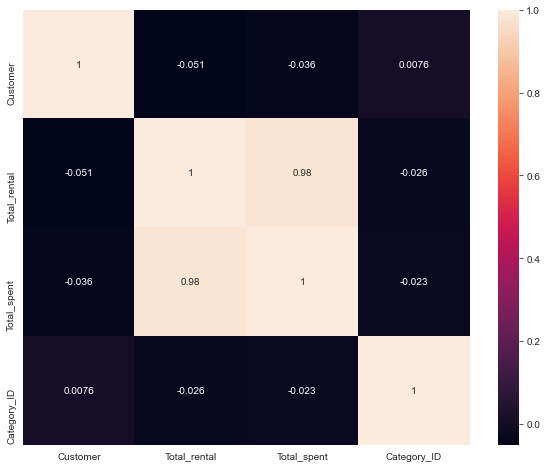

In [24]:
#Numerical columns

#checking multicolenearity
corr_matrix=data_final.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [25]:
#getting distribution of all numerical columns

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.displot(data_final['Total_spent'])
plt.show()
sns.displot(data_final['Category_ID'])
plt.show()
sns.displot(data_final['Total_rental'])
plt.show()
sns.displot(data_final['Customer'])
plt.show()

AttributeError: module 'seaborn' has no attribute 'displot'

In [26]:
#transforming numerical columns with different transformers
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
X = data_final.select_dtypes(include = np.number)
X1 = X.copy()
X2 = X.copy()

#normalizer data
transformer = Normalizer().fit(X1)
x_normalized = transformer.transform(X1)
x_normalized = pd.DataFrame(x_normalized)

#standardizing data
transformer = StandardScaler().fit(X2)
x_standarized = transformer.transform(X2)
x_standarized = pd.DataFrame(x_standarized)


In [27]:
## Model 1: Independent variables normalized

y = data_final['Category_name']
X = np.concatenate((x_normalized, categorical), axis=1)

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predictions = classification.predict(X_test)



The accuracy of the model on test set is: 1.00 
[[219   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 194   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 202   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 190   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 206   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 194   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 212   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 184   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 189   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 188   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 165   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 185   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 202   0   0]
 [  0   0   0 

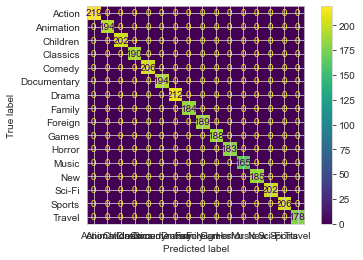

The Kappa of your model is: 1.00


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))